In [1]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
spark = SparkSession.builder.getOrCreate()
df = spark.read.parquet('washing.parquet')

In [2]:
#select temperature data
df.createOrReplaceTempView('washing')
temp = spark.sql('SELECT temperature FROM washing WHERE temperature is not null')
temp.take(5)

[Row(temperature=100),
 Row(temperature=86),
 Row(temperature=84),
 Row(temperature=84),
 Row(temperature=96)]

In [19]:
#remove name tags
temp_list = temp.rdd.map(lambda row: row.temperature)
temp_list.take(5)


[100, 86, 84, 84, 96]

In [4]:
#randomly sample 
print(temp_list.count())
temp_smp = temp_list.sample(False,0.1) #0.1 takes 10%
print(temp_smp.count())

1342
132


In [5]:
df.show(4)

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+---

In [21]:
# to create a run plot, we need the temperature and time stamp (ts)
temptime = spark.sql('SELECT temperature,ts FROM washing WHERE temperature IS NOT NULL ORDER BY ts')
print(temptime.take(3))
#remove tag and sample
temp_time = temptime.rdd.sample(False,0.1).map(lambda row: [row.temperature, row.ts]).collect()


[Row(temperature=88, ts=1547808720911), Row(temperature=97, ts=1547808721919), Row(temperature=88, ts=1547808722921)]


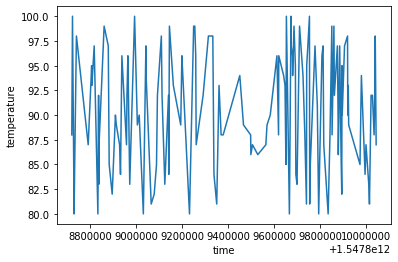

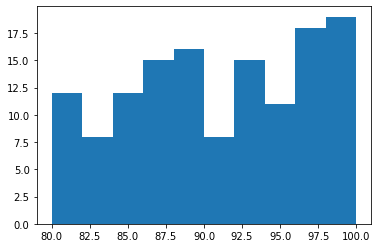

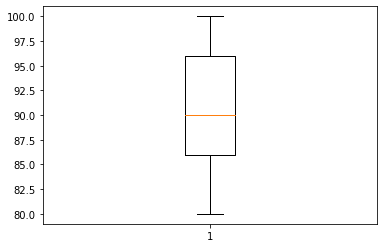

In [18]:
#convert from tuple to array and plot
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

tt = np.asarray(temp_time)
tmp,time = tt[:,0],tt[:,1]
plt.plot(time,tmp)
plt.xlabel('time')
plt.ylabel('temperature')
plt.show()

plt.hist(tmp)
plt.show()

plt.boxplot(tmp)
plt.show()

In [20]:
temp_list.collect()


[100,
 86,
 84,
 84,
 96,
 88,
 87,
 96,
 90,
 88,
 80,
 82,
 87,
 96,
 89,
 86,
 84,
 95,
 89,
 90,
 96,
 85,
 84,
 88,
 99,
 96,
 88,
 94,
 99,
 81,
 93,
 88,
 94,
 81,
 81,
 86,
 83,
 91,
 98,
 92,
 89,
 86,
 80,
 93,
 91,
 89,
 100,
 89,
 90,
 91,
 96,
 90,
 86,
 85,
 89,
 86,
 81,
 92,
 89,
 89,
 86,
 85,
 82,
 94,
 97,
 99,
 85,
 85,
 97,
 86,
 98,
 81,
 91,
 96,
 83,
 93,
 97,
 94,
 89,
 87,
 99,
 85,
 86,
 92,
 95,
 95,
 98,
 87,
 87,
 81,
 95,
 96,
 95,
 99,
 90,
 100,
 99,
 82,
 100,
 80,
 96,
 89,
 95,
 83,
 84,
 95,
 99,
 93,
 97,
 89,
 81,
 98,
 87,
 85,
 98,
 89,
 84,
 88,
 89,
 93,
 82,
 95,
 85,
 80,
 99,
 82,
 86,
 95,
 88,
 99,
 99,
 89,
 89,
 91,
 98,
 83,
 87,
 89,
 86,
 100,
 95,
 94,
 98,
 95,
 87,
 88,
 98,
 85,
 96,
 92,
 96,
 90,
 82,
 96,
 97,
 100,
 92,
 80,
 100,
 80,
 99,
 94,
 100,
 95,
 92,
 85,
 88,
 96,
 80,
 84,
 85,
 98,
 89,
 81,
 95,
 100,
 92,
 90,
 80,
 97,
 86,
 93,
 92,
 97,
 98,
 94,
 96,
 87,
 94,
 80,
 81,
 100,
 81,
 99,
 96,
 97,
 81,
 81,
